### 공통 환경

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from matplotlib import rc

### 폰트 준비

/usr/share/fonts: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/droid: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/t

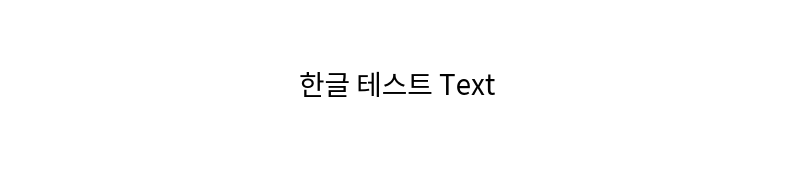

In [2]:
from utils import download_and_install_noto_font

download_and_install_noto_font(test=True)

---

In [3]:
from utils import load_keat_small

dataset, json_data = load_keat_small()
dataset

DatasetDict({
    train: Dataset({
        features: ['en_text', 'ko_text', 'categories'],
        num_rows: 5034
    })
    test: Dataset({
        features: ['en_text', 'ko_text', 'categories'],
        num_rows: 4810
    })
})

In [4]:
dataset['train'][0]

{'en_text': 'What needs to be done is to scoop up the boiled soup and side dishes on the table that wife made before she goes out, and feed them, which is not as easy as it sounds.',
 'ko_text': '아내가 외출하기 전 끓여놓은 국과 반찬을 식판에 떠서 먹이기만 하면 되는데 말처럼 쉬운 일이 아니다.',
 'categories': ['문화', '방송_연예']}

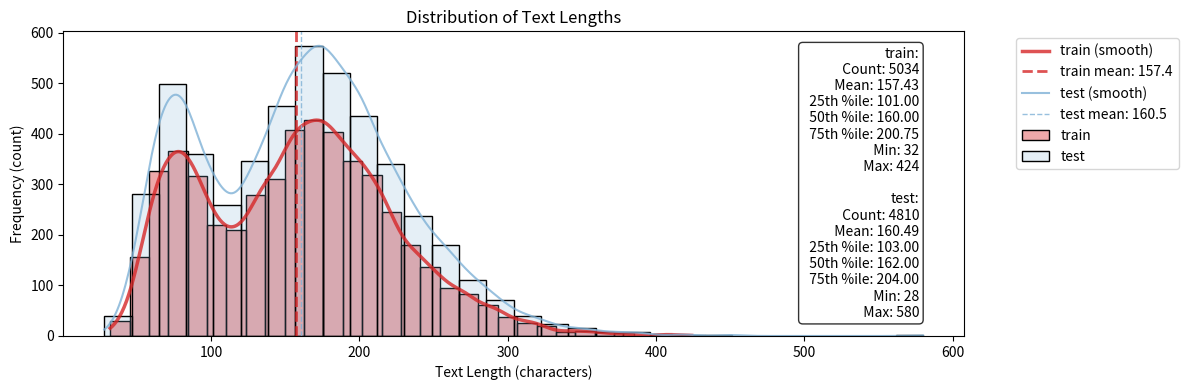

In [5]:
from utils import visualize_text_lengths

assets_dir = Path("assets")
assets_dir.mkdir(parents=True, exist_ok=True)
split2textdataset = {split: dataset[split]['en_text'] for split in dataset.keys()}
fig = visualize_text_lengths(split2textdataset, figsize=(12, 4))
plt.savefig("assets/text_lengths.png")

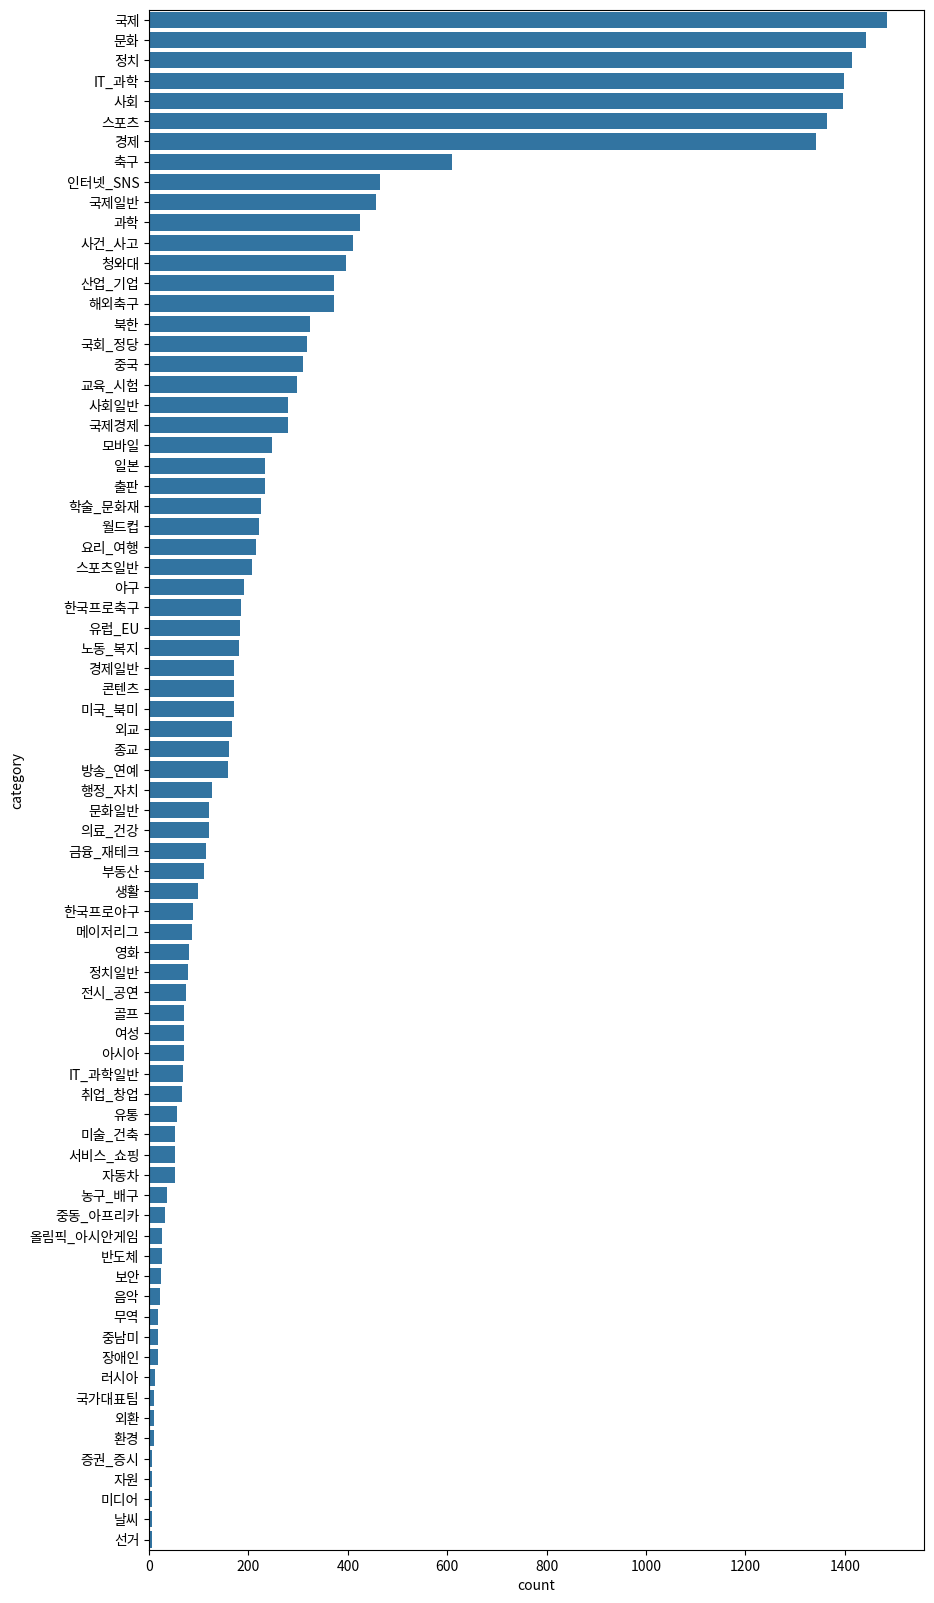

In [6]:
# 폰트 설정
rc('font', family='Noto Sans CJK KR')

all_categories = {}
for split in split2textdataset.keys():
    for i in range(len(dataset[split])):
        for category in dataset[split][i]['categories']:
            if category not in all_categories:
                all_categories[category] = 1
            else:
                all_categories[category] += 1

df = pd.DataFrame(list(all_categories.items()), columns=['category', 'count'])
df = df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 20))
sns.barplot(data=df, y='category', x='count')
plt.savefig(assets_dir / "category_distribution.png")

In [7]:
# Print statistics in simplified table format
print("| Label Name | Count |")
print("|------------|--------|")
for _, row in df.iterrows():
    print(f"| {row['category']} | {row['count']} |")

| Label Name | Count |
|------------|--------|
| 국제 | 1485 |
| 문화 | 1442 |
| 정치 | 1415 |
| IT_과학 | 1398 |
| 사회 | 1397 |
| 스포츠 | 1365 |
| 경제 | 1342 |
| 축구 | 610 |
| 인터넷_SNS | 465 |
| 국제일반 | 457 |
| 과학 | 424 |
| 사건_사고 | 410 |
| 청와대 | 397 |
| 산업_기업 | 372 |
| 해외축구 | 372 |
| 북한 | 323 |
| 국회_정당 | 318 |
| 중국 | 310 |
| 교육_시험 | 298 |
| 사회일반 | 279 |
| 국제경제 | 279 |
| 모바일 | 247 |
| 일본 | 233 |
| 출판 | 233 |
| 학술_문화재 | 225 |
| 월드컵 | 221 |
| 요리_여행 | 216 |
| 스포츠일반 | 208 |
| 야구 | 192 |
| 한국프로축구 | 186 |
| 유럽_EU | 183 |
| 노동_복지 | 181 |
| 경제일반 | 170 |
| 콘텐츠 | 170 |
| 미국_북미 | 170 |
| 외교 | 167 |
| 종교 | 160 |
| 방송_연예 | 159 |
| 행정_자치 | 127 |
| 문화일반 | 121 |
| 의료_건강 | 121 |
| 금융_재테크 | 114 |
| 부동산 | 110 |
| 생활 | 98 |
| 한국프로야구 | 89 |
| 메이저리그 | 86 |
| 영화 | 81 |
| 정치일반 | 78 |
| 전시_공연 | 74 |
| 골프 | 71 |
| 여성 | 70 |
| 아시아 | 70 |
| IT_과학일반 | 68 |
| 취업_창업 | 66 |
| 유통 | 57 |
| 미술_건축 | 53 |
| 서비스_쇼핑 | 53 |
| 자동차 | 53 |
| 농구_배구 | 36 |
| 중동_아프리카 | 32 |
| 올림픽_아시안게임 | 27 |
| 반도체 | 27 |
| 보안 | 24 |
| 음악 | 22 |
| 무역 | 19 |
| 중남